<a href="https://colab.research.google.com/github/ttogle918/ds-section1-sprint2/blob/master/n123-confidence-intervals/n123a-confidence-intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 3*

# 📝 Assignment

# 신뢰구간

서울시 기간별 시간평균 대기환경 정보 데이터셋을 이용합니다.

<img src='https://user-images.githubusercontent.com/6457691/89852263-740add80-dbc9-11ea-9e6b-8059b3f7e479.png'>

<https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do>

### `2020년 3월`의 송파구 데이터만 사용합니다.



## 1. 데이터셋을 불러오세요

  - 데이터는 `df`라는 변수에 저장되어야 하며
  - Feature로는 `측정일시`, `측정소명`, `오존(ppm)` 만 사용합니다.
  - 인덱스를 초기화 합니다.

In [1]:
# 이 곳에 답안을 작성하시길 바랍니다
from google.colab import files, drive
# uploaded = files.upload()
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
col = ['측정일시', '측정소명', '오존(ppm)']

In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/code_states/서울시_기간별_시간평균_대기환경_정보_2020.03.csv", encoding = "CP949", engine='python')
df.head()

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,202003312300,100,도심권,111123,종로구,47,48,22,0.036,0.018,0.4,0.004
1,202003312300,100,도심권,111131,용산구,55,52,21,0.024,0.033,0.5,0.003
2,202003312300,100,도심권,111121,중구,43,43,24,0.034,0.020,0.4,0.003
3,202003312300,101,서북권,111181,은평구,51,54,18,0.047,0.010,0.3,0.003
4,202003312300,101,서북권,111191,서대문구,58,57,21,0.047,0.012,0.6,0.003


In [4]:
df = df[df['측정소명'] == '송파구'].reset_index()
df = df[col]
df.head()

,측정일시,측정소명,오존(ppm)
0,202003312300,송파구,0.020
1,202003312200,송파구,0.021
2,202003312100,송파구,0.025
3,202003312000,송파구,0.032
4,202003311900,송파구,0.034


## 2. 데이터셋으로 부터 2개의 샘플을 생성하세요.

- `s1`에 저장된 1개는 20개의 데이터, `s2`에 저장된 다른 1개는 200개이며 
- 두 경우 모두 `random_state`로 `42`를 설정합니다.

In [5]:
# 이 곳에 답안을 작성하시길 바랍니다
s1 = df.sample(n=20, random_state=42)
print( len(s1) )
s1.head()

20


,측정일시,측정소명,오존(ppm)
609,202003061400,송파구,0.021
539,202003091200,송파구,0.020
694,202003030100,송파구,0.002
350,202003170900,송파구,0.009
174,202003241700,송파구,0.044


In [6]:
s2 = df.sample(n=200, random_state=42)
print(len(s2))
s2.head()

200


,측정일시,측정소명,오존(ppm)
609,202003061400,송파구,0.021
539,202003091200,송파구,0.020
694,202003030100,송파구,0.002
350,202003170900,송파구,0.009
174,202003241700,송파구,0.044


## 3. 두 샘플데이터에 대해서 `오존(ppm)`항목의 표본 평균을 계산하세요.

In [7]:
# 이 곳에 답안을 작성하시길 바랍니다
import numpy as np
mean1 = np.mean(s1['오존(ppm)'])
mean2 = np.mean(s2['오존(ppm)'])
print("mean1 : ", mean1)
print("mean2 : ", mean2)

mean1 :  0.021750000000000002
mean2 :  0.02291999999999995


## 4. 위에서 추정한 값들을 바탕으로, 95%에 해당하는 신뢰구간을 `CI1과` `CI2`에 계산하세요.

  - `ddof`는 `1`을 사용합니다.

In [8]:
from scipy import stats
def confidence_interval(data, mean, confidence = 0.95):
  data = np.array(data)
  n = len(data)
  sample_std = np.std(data, ddof = 1)
  stderr = sample_std / n ** 0.5
  
  interval = stderr * stats.t.ppf( (1 + confidence) / 2 , n - 1) # ppf : inverse of cdf
  return (mean, mean - interval, mean + interval, sample_std, stderr)


In [9]:
# 표준 오차
# std_err1 = sample_std1 / n1 ** 0.5
Cl1 = confidence_interval(s1['오존(ppm)'], mean1)
print("95% 신뢰구간: ", Cl1)

95% 신뢰구간:  (0.021750000000000002, 0.015060460813957325, 0.02843953918604268, 0.014293447155215825, 0.0031961119471863573)


In [10]:
# 표준오차
# std_err2 = sample_std2 / n2 ** 0.5

Cl2 = confidence_interval(s2['오존(ppm)'], mean2)
print("95% 신뢰구간: ", Cl2)

95% 신뢰구간:  (0.02291999999999995, 0.021006515262626202, 0.0248334847373737, 0.013722797669549638, 0.00097034832889895)


## 5. `plt.bar`를 사용하여 다음과 같은 신뢰구간 시각화를 그리세요.
  - 이때 보라색 선에 해당 하는 값을 `pop_mean`에 저장하세요.
  - `colors = '#4000c7'`을 사용하세요.
  - 보라색 선 : 평균?
<img src='https://i.imgur.com/3orh30m.png'>






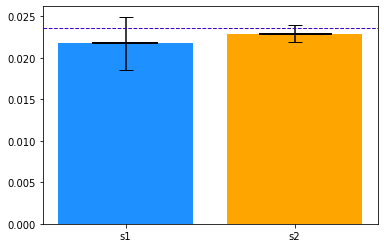

In [12]:
import numpy as np
import matplotlib.pyplot as plt

pop_mean = df['오존(ppm)'].mean()

x = ['s1', 's2']
y = [mean1, mean2]
err = [Cl1[4], Cl2[4]]  # 표준오차

plt.bar(x, y, yerr = err, capsize = 7, color = ['dodgerblue', 'orange'], width = 0.8)
plt.axhline(pop_mean, 0, 1, color='#4000c7', linestyle='--', linewidth='1');
plt.axhline(mean1, 0.15, 0.34, color='black', linestyle='-', linewidth='2');
plt.axhline(mean2, 0.65, 0.86, color='black', linestyle='-', linewidth='2');
# plt.show()


# 🔥 도전과제
> 아래 두 문제를 모두 다 하시면 됩니다.

## 1. [plotly](https://plotly.com/) 나 [seaborn](http://seaborn.pydata.org/index.html), [bokeh](https://docs.bokeh.org/en/latest/index.html) 등 다른 시각화 라이브러리를 선택하여 앞에서 그렸던 신뢰구간을 해당 라이브러리를 선택하여 그려보세요.

In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다

## 2. 위 데이터의 `초미세먼지` 데이터를 사용하여, 큰 수의 법칙과, 중심극한정리를 구현하는 코드를 작성하세요.

In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다